In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [11]:
data = load_breast_cancer()
X = data.data
y = data.target

**Exploratory Data Analysis (EDA)**

In [12]:
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

**Selecting the best features**

In [13]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print("Selected Features:", data.feature_names[selector.get_support()])

Selected Features: ['mean radius' 'mean perimeter' 'mean area' 'mean concavity'
 'mean concave points' 'worst radius' 'worst perimeter' 'worst area'
 'worst concavity' 'worst concave points']


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=52)

**Building the KNN Classifier Model with Cross-Validation**

In [15]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_new, y, cv=10)
print("Cross-Validation Scores:\n", scores)
print("\nMean Accuracy:", np.mean(scores))

Cross-Validation Scores:
 [0.9122807  0.85964912 0.89473684 0.96491228 0.92982456 0.92982456
 0.96491228 0.9122807  0.9122807  0.98214286]

Mean Accuracy: 0.9262844611528822


In [16]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [17]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion)

Accuracy: 0.956140350877193

Confusion Matrix:
 [[37  2]
 [ 3 72]]


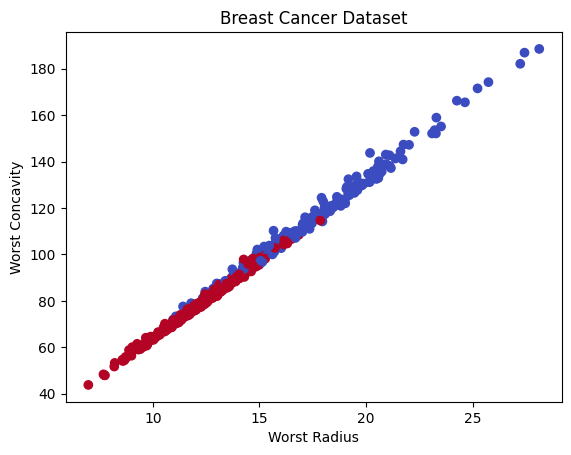

In [18]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, cmap='coolwarm')
plt.xlabel('Worst Radius')
plt.ylabel('Worst Concavity')
plt.title('Breast Cancer Dataset')
plt.show()